# COVID-19 Fashion Industry Stock Analysis

In [261]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cufflinks as cf
cf.go_offline()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
from pandas_datareader import data

In [231]:
df =  pd.read_csv("Final Data.csv", index_col=0) 
print(df)

            Brunello_Cucinelli_Price  Christian Dior_Price  Kering_Price  \
Date                                                                       
12/31/2019                    31.695                456.45         588.3   
1/2/2020                      32.168                463.20         600.9   
1/3/2020                      32.109                461.60         600.2   
1/6/2020                      31.780                460.00         592.0   
1/7/2020                      34.049                461.80         595.6   
...                              ...                   ...           ...   
1/25/2021                     33.680                442.60         535.9   
1/26/2021                     34.060                445.40         555.0   
1/27/2021                     33.720                437.80         539.5   
1/28/2021                     33.980                444.40         557.2   
1/29/2021                     33.300                430.80         540.4   

           

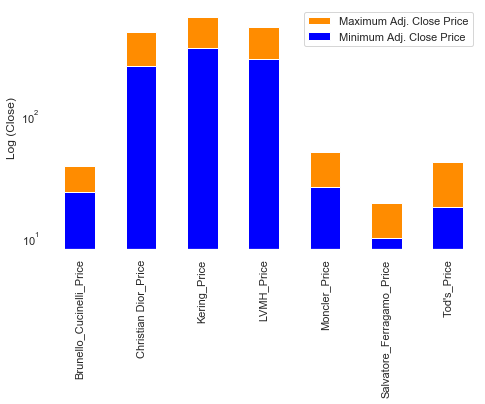

In [237]:
# maximum and minimum adjusted close price 

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
max_close = df.max()
#print(max_close)
min_close = df.min()
#print(min_close)
plt.figure(figsize=(7,4))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='darkorange',label='Maximum Adj. Close Price')
min_close.plot(kind='bar',color='blue',label='Minimum Adj. Close Price')
plt.legend()

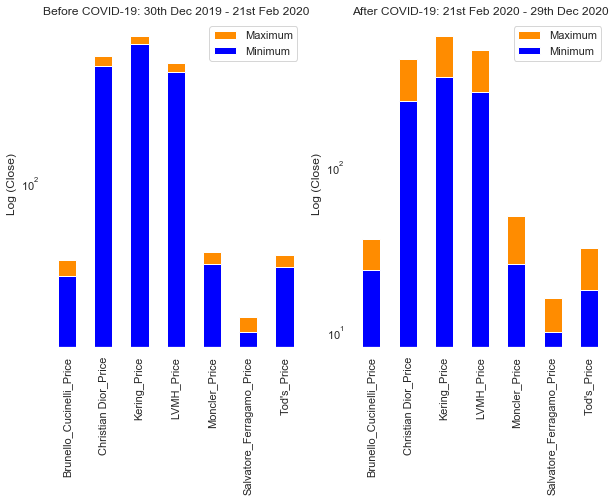

In [238]:
# spliting data into before covid and after covid 

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

# before covid
max_close_pre_corona = df.loc['1/2/2020':'2/21/2020'].max()
min_close_pre_corona = df.loc['1/2/2020':'2/21/2020'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='darkorange')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='blue')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Before COVID-19: 30th Dec 2019 - 21st Feb 2020')

# after covid
max_close_post_corona = df.loc['2/24/2020':'12/29/2020'].max()
min_close_post_corona = df.loc['2/24/2020':'12/29/2020'].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='darkorange')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='blue')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('After COVID-19: 21st Feb 2020 - 29th Dec 2020')

b= df.loc['1/2/2020':'2/21/2020']
dfa = df.loc['2/24/2020':'12/29/2020']


In [241]:
# finding returns 

returns = df.pct_change()
returns = returns.drop(['12/31/2019'])
returns

,Brunello_Cucinelli_Price,Christian Dior_Price,Kering_Price,LVMH_Price,Moncler_Price,Salvatore_Ferragamo_Price,Tod's_Price
Date,,,,,,,
1/2/2020,0.014923,0.014788,0.021418,0.022898,0.013033,0.003300,0.003848
1/3/2020,-0.001834,-0.003454,-0.001165,-0.011015,-0.012767,-0.011141,-0.000482
1/6/2020,-0.010246,-0.003466,-0.013662,0.001916,-0.002238,-0.008315,-0.036662
1/7/2020,0.071397,0.003913,0.006081,-0.006096,0.004487,0.008385,0.000000
1/8/2020,0.012570,0.005197,0.002686,0.017198,0.026551,0.010193,0.007511
...,...,...,...,...,...,...,...
1/25/2021,-0.012896,-0.005840,-0.015794,-0.013010,-0.025846,-0.016981,-0.032187
1/26/2021,0.011283,0.006326,0.035641,0.023018,0.013687,0.014075,0.016629
1/27/2021,-0.009982,-0.017063,-0.027928,-0.031346,-0.022435,0.035962,0.014126


In [242]:
returns.idxmin()

# findind when stock prices are minimum 

Brunello_Cucinelli_Price     3/23/2020
Christian Dior_Price         3/16/2020
Kering_Price                 3/16/2020
LVMH_Price                   3/16/2020
Moncler_Price                3/16/2020
Salvatore_Ferragamo_Price    3/12/2020
Tod's_Price                  2/24/2020
dtype: object

In [243]:
returns.idxmax()

# finding when stock prices are maximum

Brunello_Cucinelli_Price     3/24/2020
Christian Dior_Price         3/24/2020
Kering_Price                 3/17/2020
LVMH_Price                   3/17/2020
Moncler_Price                3/13/2020
Salvatore_Ferragamo_Price    5/28/2020
Tod's_Price                  3/18/2020
dtype: object

In [244]:
returnsB= returns.loc['1/2/2020':'2/21/2020']
returnsA = returns.loc['2/24/2020':'12/29/2020']

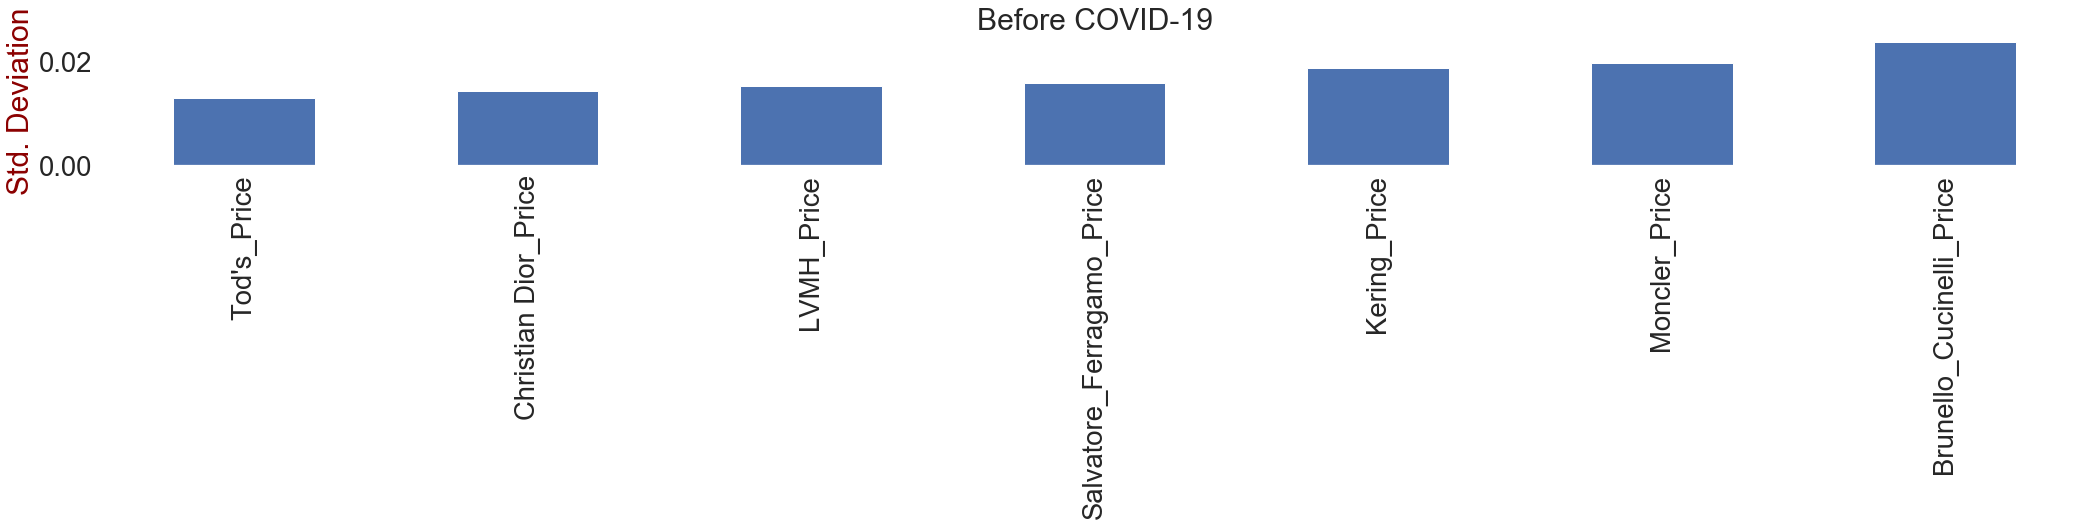

In [245]:
# applying standard deviation for before COVID 
stdb = returnsB.std()
stda = returnsA.std()
plt.figure(figsize=(30,8))
sns.set(font_scale=2.5)
ax = stdb.sort_values().plot.bar(title="Before COVID-19")
plt.ylabel("Std. Deviation", color = 'darkred')
plt.tight_layout()
ax.set_facecolor('w')

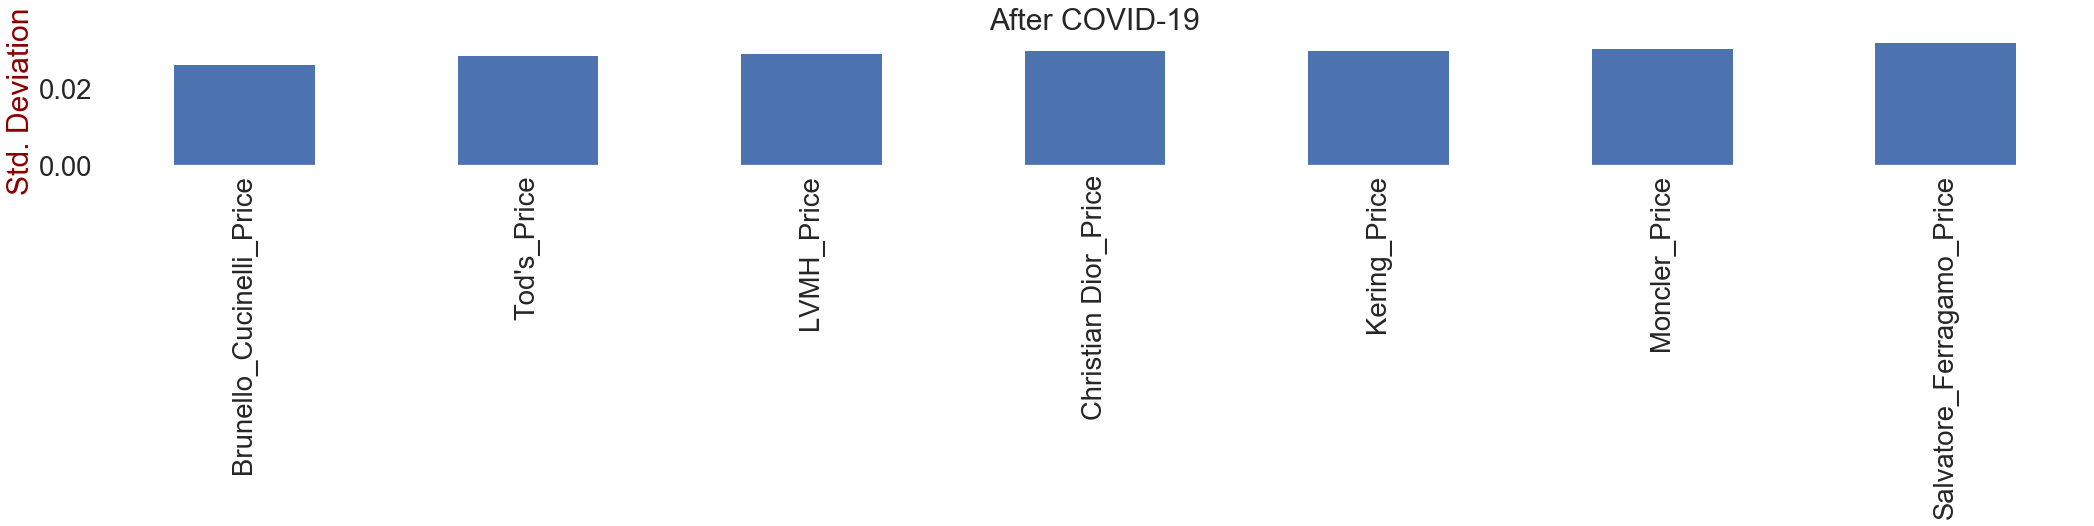

In [246]:
# applying standard deviation for after COVID
stda = returnsA.std()
plt.figure(figsize=(30,8))
sns.set(font_scale=2.5)
ax = stda.sort_values().plot.bar(title="After COVID-19")
plt.ylabel("Std. Deviation", color='darkred')
plt.tight_layout()
ax.set_facecolor('w')

In [251]:
dfb= df.loc['1/2/2020':'2/21/2020']
dfa = df.loc['2/24/2020':'12/29/2020']
dfa = dfa/dfa.iloc[0]

In [248]:
dfa.head()

,Brunello_Cucinelli_Price,Christian Dior_Price,Kering_Price,LVMH_Price,Moncler_Price,Salvatore_Ferragamo_Price,Tod's_Price
Date,,,,,,,
2/24/2020,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2/25/2020,0.992802,0.974422,0.978503,0.974720,0.996010,1.014879,1.015238
2/26/2020,0.930280,0.988687,1.001152,0.991009,1.009119,1.024913,1.021587
2/27/2020,0.903153,0.946877,0.957006,0.941491,1.002565,0.985121,1.009524
2/28/2020,0.944268,0.933596,0.971209,0.977326,1.001995,0.980277,0.994921


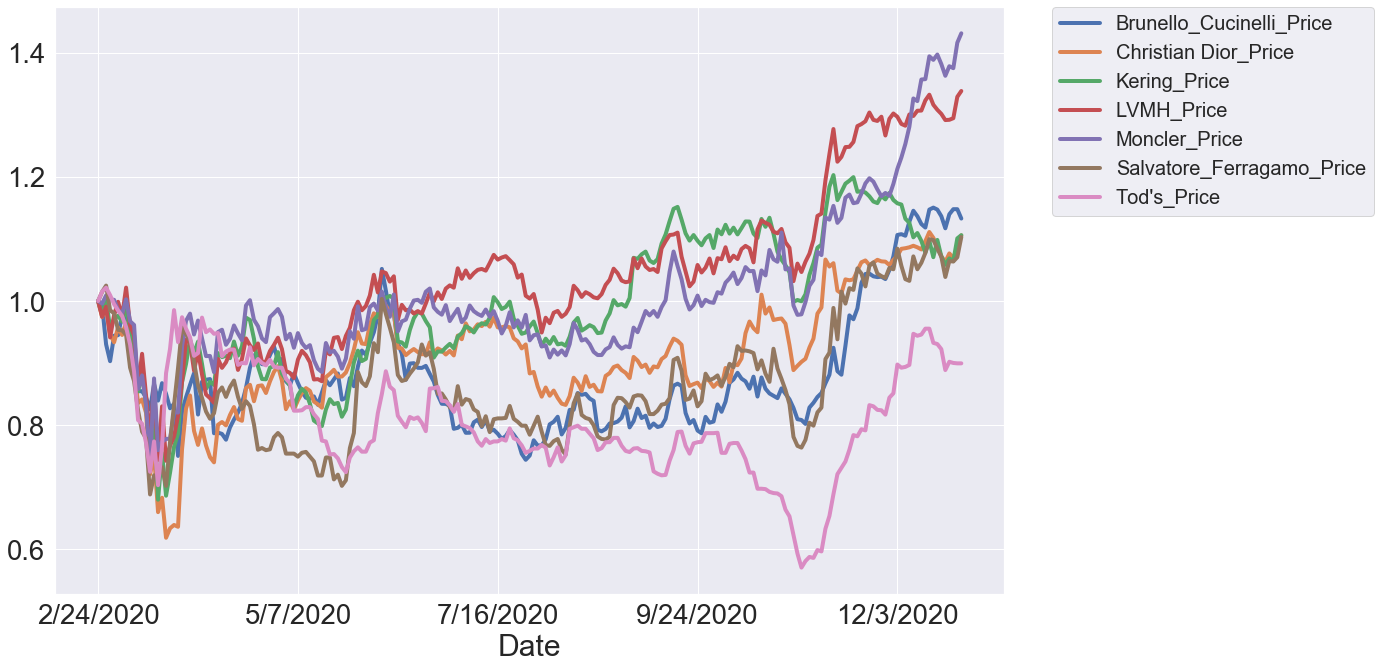

In [249]:
dfa.plot(figsize=(20,10),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 20})
plt.tight_layout()

In [254]:
dfb = dfb/dfb.iloc[35]
dfb.head()

,Brunello_Cucinelli_Price,Christian Dior_Price,Kering_Price,LVMH_Price,Moncler_Price,Salvatore_Ferragamo_Price,Tod's_Price
Date,,,,,,,
1/2/2020,0.939651,1.060925,1.056063,1.026629,1.063724,1.145548,1.147759
1/3/2020,0.937927,1.057261,1.054833,1.015321,1.050144,1.132786,1.147205
1/6/2020,0.928317,1.053596,1.040422,1.017267,1.047793,1.123367,1.105147
1/7/2020,0.994596,1.057719,1.046749,1.011065,1.052494,1.132786,1.105147
1/8/2020,1.007098,1.063216,1.049561,1.028453,1.080439,1.144333,1.113448


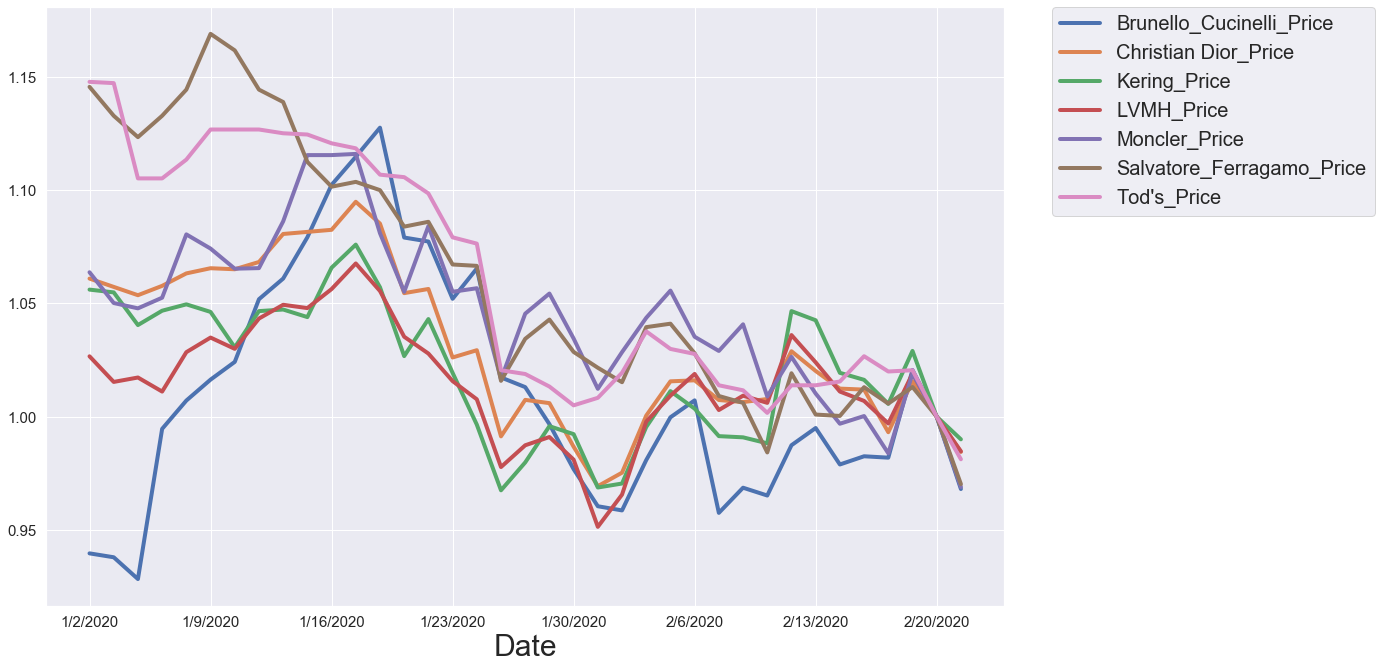

In [255]:
dfb.plot(figsize=(20,10),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 20})
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

In [182]:
dfall = df/df.iloc[36]
dfall.head()

,Brunello_Cucinelli_Price,Christian Dior_Price,Kering_Price,LVMH_Price,Moncler_Price,Salvatore_Ferragamo_Price,Tod’s_Price
Date,,,,,,,
12/31/2019,0.925834,1.045465,1.033919,1.003648,1.050039,1.141781,1.143359
1/2/2020,0.939651,1.060925,1.056063,1.026629,1.063724,1.145548,1.147759
1/3/2020,0.937927,1.057261,1.054833,1.015321,1.050144,1.132786,1.147205
1/6/2020,0.928317,1.053596,1.040422,1.017267,1.047793,1.123367,1.105147
1/7/2020,0.994596,1.057719,1.046749,1.011065,1.052494,1.132786,1.105147


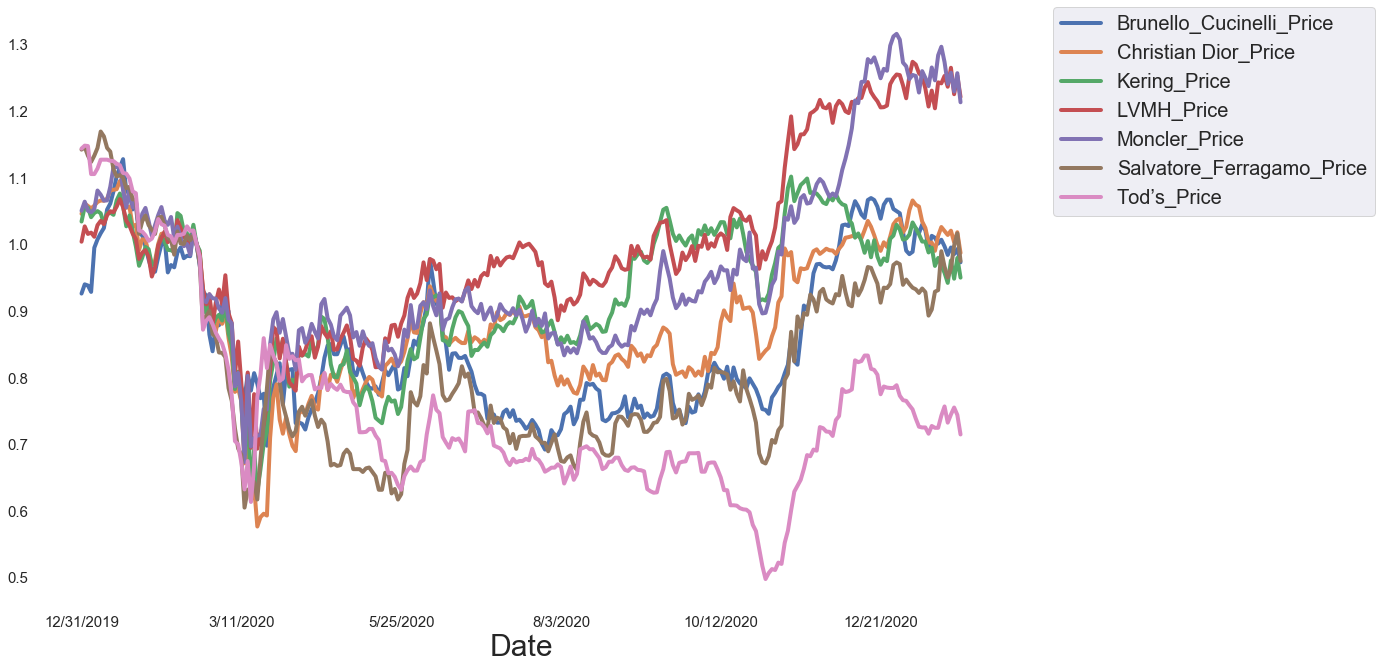

In [257]:
ax = dfall.plot(figsize=(20,10),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 20})
plt.tick_params( labelsize=15)
plt.tight_layout()
ax.set_facecolor('w')

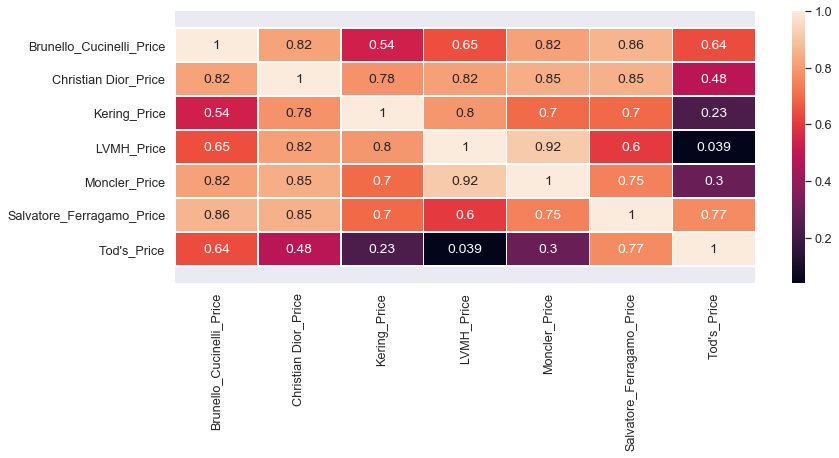

<Figure size 432x288 with 0 Axes>

In [260]:
plt.figure(figsize=(13,5))
sns.set(font_scale=1.15)
sns.heatmap(df.corr(),linewidths=.5,annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()